In [1]:
! wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE123nnn/GSE123813/suppl/GSE123813%5Fbcc%5FscRNA%5Fcounts.txt.gz

--2024-08-05 20:13:32--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE123nnn/GSE123813/suppl/GSE123813%5Fbcc%5FscRNA%5Fcounts.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105220738 (100M) [application/x-gzip]
Saving to: ‘GSE123813_bcc_scRNA_counts.txt.gz’

GSE123813_bcc_scRNA 100%[===================>] 100.35M  99.4MB/s    in 1.0s    

2024-08-05 20:13:33 (99.4 MB/s) - ‘GSE123813_bcc_scRNA_counts.txt.gz’ saved [105220738/105220738]



In [2]:
! gunzip GSE123813_bcc_scRNA_counts.txt.gz

In [17]:
import pandas as pd
import scanpy as sc
import numpy as np

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 pynndescent==0.5.13


In [24]:
adata = (sc.read_csv("GSE123813_bcc_scRNA_counts.txt", first_column_names=True, delimiter ="\t"))

In [36]:
ad = adata.transpose()

In [37]:
ad.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [38]:
ad

AnnData object with n_obs × n_vars = 53030 × 23309

normalizing counts per cell
    finished (0:00:03)


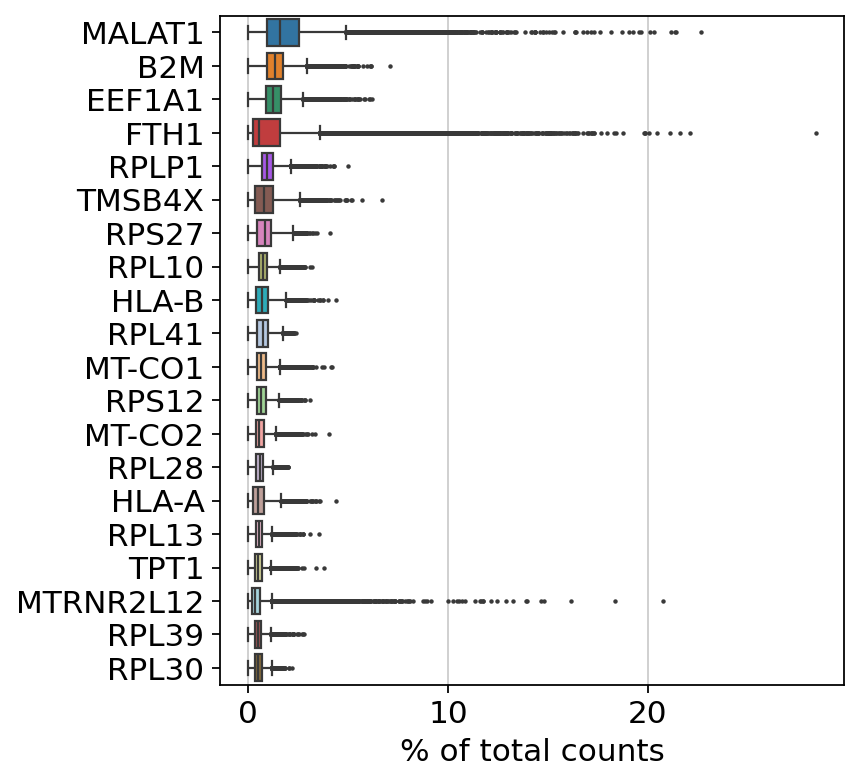

In [39]:
sc.pl.highest_expr_genes(ad, n_top=20)

In [40]:
adata = ad
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1 cells that have less than 200 genes expressed
filtered out 348 genes that are detected in less than 3 cells


In [41]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

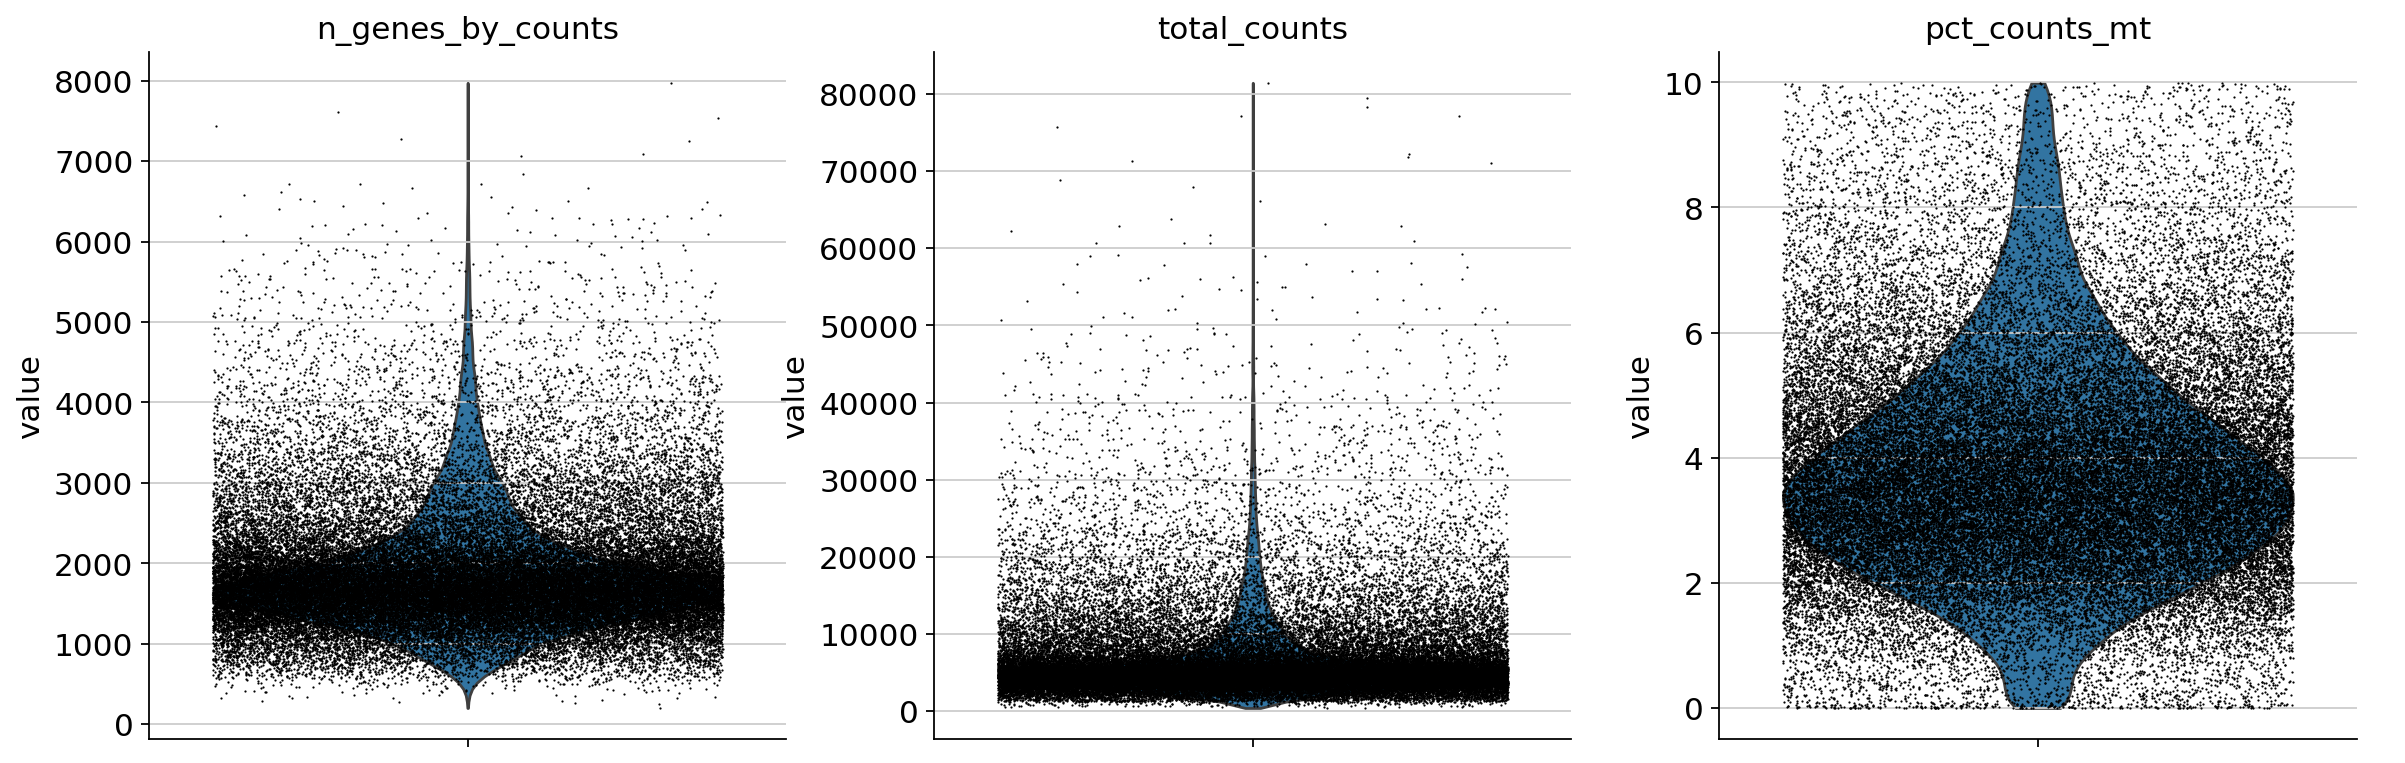

In [42]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

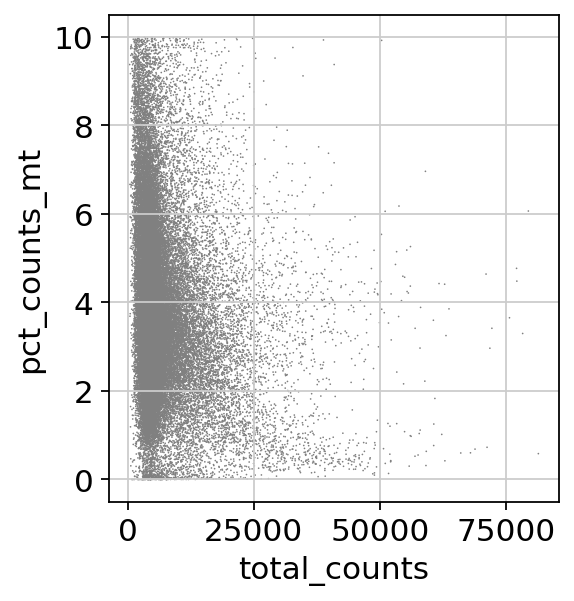

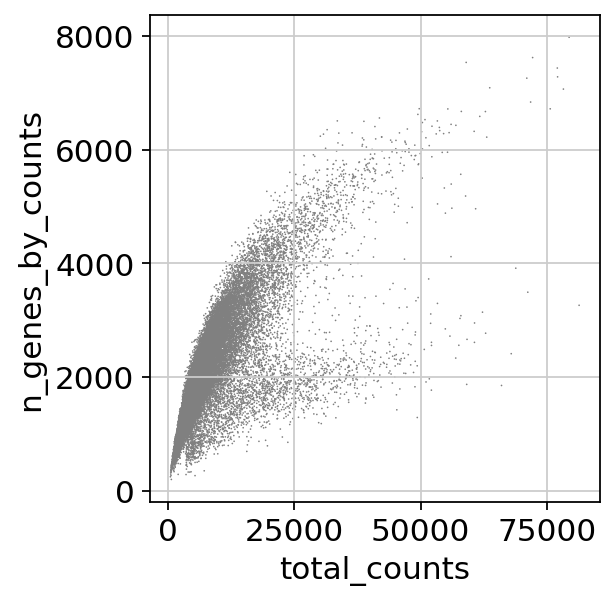

In [43]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")